In [6]:
import pandas as pd

df = pd.read_csv('/content/housing.csv')
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  median_house_value  \
0             322       126.0         8.3252            452600.0   
1            2401      1138.0         8.3014            358500.0   
2             496       177.0         7.2574            352100.0   
3             558       219.0         5.6431            341300.0   
4             565         NaN         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635         845       330.0         1.5603             78100.0   
20636         356       114.0         2.5568             77100.0   
20637        1007       433.0         1.7000             92300.0   
20638         741       349.0         1.8672             84700.0   
20639        1387       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [7]:

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(df['total_rooms'], bins=50, edgecolor='black')
plt.title('Distribution of Total Rooms')
plt.xlabel('Total Rooms')
plt.ylabel('Frequency')
plt.show()


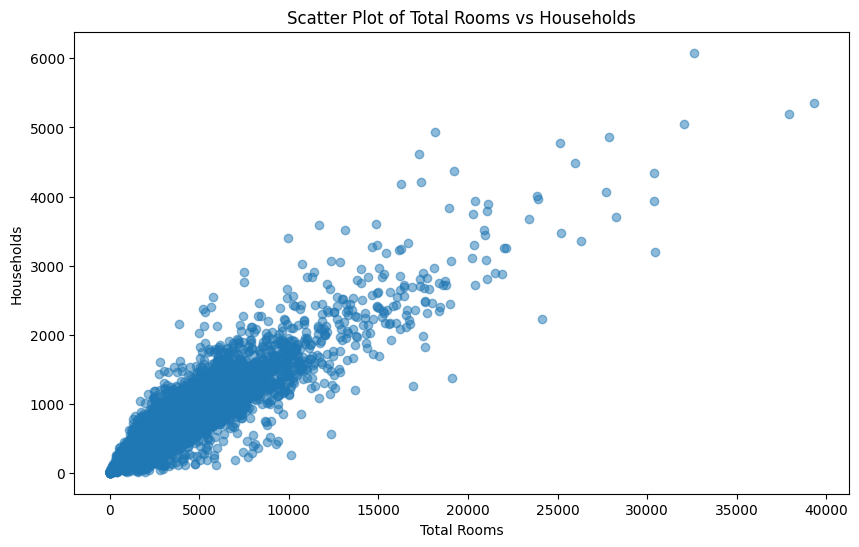

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['total_rooms'], df['households'], alpha=0.5)
plt.title('Scatter Plot of Total Rooms vs Households')
plt.xlabel('Total Rooms')
plt.ylabel('Households')
plt.show()


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=df, palette='viridis')
plt.title('Count Plot of Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()




<ipython-input-9-cd4221484cb2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ocean_proximity', data=df, palette='viridis')


In [10]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  median_house_value  \
0             322       126.0         8.3252            452600.0   
1            2401      1138.0         8.3014            358500.0   
2             496       177.0         7.2574            352100.0   
3             558       219.0         5.6431            341300.0   
4             565         NaN         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635         845       330.0         1.5603             78100.0   
20636         356       114.0         2.5568             77100.0   
20637        1007       433.0         1.7000             92300.0   
20638         741       349.0         1.8672             84700.0   
20639        1387       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) != len(df.columns):
    non_numeric_cols = df.columns.difference(numeric_cols)
    print(f"تم العثور على أعمدة غير رقمية: {non_numeric_cols}")

correlation_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


تم العثور على أعمدة غير رقمية: Index(['ocean_proximity'], dtype='object')


In [13]:
mising_values = df.isnull().sum()
mising_values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        211
population              0
households              4
median_income           0
median_house_value      2
ocean_proximity         3
dtype: int64

In [14]:
import pandas as pd

df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)
df['households'].fillna(df['households'].mean(), inplace=True)
df['median_house_value'].fillna(df['median_house_value'].mean(), inplace=True)

df['ocean_proximity'].fillna(df['ocean_proximity'].mode()[0], inplace=True)

df.head()




longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population   households  median_income  median_house_value ocean_proximity  
0         322   126.000000         8.3252            452600.0        NEAR BAY  
1        2401  1138.000000         8.3014            358500.0        NEAR BAY  
2         496   177.000000         7.2574            352100.0        NEAR BAY  
3         558   219.000000         5.6431            341300.0        NEAR BAY  
4         565   499.575111         3.8462            342200.0        NEAR BAY

In [15]:
 df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 1.6 MB


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population   households  median_income  median_house_value  ocean_proximity  
0         322   126.000000         8.3252            452600.0                3  
1        2401  1138.000000         8.3014            358500.0                3  
2         496   177.000000         7.2574            352100.0                3  
3         558   219.000000         5.6431            341300.0                3  
4         565   499.575111         3.8462            342200.0                3

In [24]:

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_resampled_scaled = scaler.fit_transform(df)


In [26]:
X_resampled_scaled

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.53966842, 0.90226638,
        0.75      ],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.53802706, 0.70824656,
        0.75      ],
       [0.21015936, 0.5642933 , 1.        , ..., 0.46602805, 0.69505074,
        0.75      ],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.08276438, 0.15938285,
        0.25      ],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.09429525, 0.14371281,
        0.25      ],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.13025338, 0.15340349,
        0.25      ]])

In [20]:
data= pd.DataFrame(X_resampled_scaled)

In [21]:
data

0         1         2         3         4         5         6  \
0      0.211155  0.567481  0.784314  0.022331  0.019863  0.008941  0.020556   
1      0.212151  0.565356  0.392157  0.180503  0.171477  0.067210  0.186976   
2      0.210159  0.564293  1.000000  0.037260  0.029330  0.013818  0.028943   
3      0.209163  0.564293  1.000000  0.032352  0.036313  0.015555  0.035849   
4      0.209163  0.564293  1.000000  0.041330  0.043296  0.015752  0.081989   
...         ...       ...       ...       ...       ...       ...       ...   
20635  0.324701  0.737513  0.470588  0.042296  0.057883  0.023599  0.054103   
20636  0.312749  0.738576  0.333333  0.017676  0.023122  0.009894  0.018582   
20637  0.311753  0.732200  0.313725  0.057277  0.075109  0.028140  0.071041   
20638  0.301793  0.732200  0.333333  0.047256  0.063315  0.020684  0.057227   
20639  0.309761  0.725824  0.294118  0.070782  0.095438  0.038790  0.086992   

              7         8     9  
0      0.539668  0.902266  0.75  
1      0.538027  0.708247  0.75  
2      0.466028  0.695051  0.75  
3      0.354699  0.672783  0.75  
4      0.230776  0.674638  0.75  
...         ...       ...   ...  
20635  0.073130  0.130105  0.25  
20636  0.141853  0.128043  0.25  
20637  0.082764  0.159383  0.25  
20638  0.094295  0.143713  0.25  
20639  0.130253  0.153403  0.25  

[20640 rows x 10 columns]

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y, test_size=0.2, random_state=42)

print(f"TRAIN {X_train.shape[0]}")
print(f"TEST: {X_test.shape[0]}")


TRAIN 16512
TEST: 4128


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 1.4104260257228918e-09
